In [1]:
# Add your imports here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read data
data = pd.read_csv("Data/heart_2020_cleaned.csv")

In [3]:
data["Smoking"] = data["Smoking"].map(dict(Yes=1, No=0))
data["AlcoholDrinking"] = data["AlcoholDrinking"].map(dict(Yes=1, No=0))
data["DiffWalking"] = data["DiffWalking"].map(dict(Yes=1, No=0))
data["Stroke"] = data["Stroke"].map(dict(Yes=1, No=0))
# data["Diabetic"] = data["Diabetic"].map(dict(Yes=1, No=0))
data["PhysicalActivity"] = data["PhysicalActivity"].map(dict(Yes=1, No=0))
data["Asthma"] = data["Asthma"].map(dict(Yes=1, No=0))
data["KidneyDisease"] = data["KidneyDisease"].map(dict(Yes=1, No=0))
data["SkinCancer"] = data["SkinCancer"].map(dict(Yes=1, No=0))
data["Sex"] = data["Sex"].map(dict(Female=1, Male=0))
data["HeartDisease"] = data["HeartDisease"].map(dict(Yes=1, No=0))
data["AgeCategory"] = data["AgeCategory"].map({"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, "60-64":8, "65-69":9, "70-74":10, "75-79":11, "80 or older":12})
data["GenHealth"] = data["GenHealth"].map({"Poor":0, "Fair":1, "Good":2, "Very good":3, "Excellent":4})

In [4]:
race_dummies = pd.get_dummies(data["Race"])
diabetes_dummies = pd.get_dummies(data['Diabetic'])

In [5]:
data = pd.concat([data, race_dummies], axis = 1)
data = pd.concat([data, diabetes_dummies], axis = 1)
data = data.drop(columns = 'Race')
data = data.drop(columns = 'Diabetic')
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'American Indian/Alaskan Native', 'Asian', 'Black',
       'Hispanic', 'Other', 'White', 'No', 'No, borderline diabetes', 'Yes',
       'Yes (during pregnancy)'],
      dtype='object')

In [6]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [7]:
hd_corr = data.corr()['HeartDisease'].abs().sort_values()
hd_corr

Other                             0.003039
SleepTime                         0.008327
American Indian/Alaskan Native    0.008547
Black                             0.010156
Yes (during pregnancy)            0.013930
No, borderline diabetes           0.016182
MentalHealth                      0.028591
Asian                             0.030262
AlcoholDrinking                   0.032080
Hispanic                          0.036163
White                             0.040121
Asthma                            0.041444
BMI                               0.051803
Sex                               0.070040
SkinCancer                        0.093317
PhysicalActivity                  0.100030
Smoking                           0.107764
KidneyDisease                     0.145197
PhysicalHealth                    0.170721
No                                0.170977
Yes                               0.183072
Stroke                            0.196835
DiffWalking                       0.201258
AgeCategory

In [8]:
cols_to_drop = hd_corr.index[:14].values

In [9]:
data = data.drop(columns = cols_to_drop)
data

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,KidneyDisease,SkinCancer,No,Yes
0,0,1,0,3.0,0,7,1,3,0,1,0,1
1,0,0,1,0.0,0,12,1,3,0,0,1,0
2,0,1,0,20.0,0,9,1,1,0,0,0,1
3,0,0,0,0.0,0,11,0,2,0,1,1,0
4,0,0,0,28.0,1,4,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,7.0,1,8,0,1,0,0,0,1
319791,0,1,0,0.0,0,3,1,3,0,0,1,0
319792,0,0,0,0.0,0,5,1,2,0,0,1,0
319793,0,0,0,0.0,0,1,0,2,0,0,1,0


In [10]:
data = data.drop(columns = 'Yes')

In [11]:
data

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,KidneyDisease,SkinCancer,No
0,0,1,0,3.0,0,7,1,3,0,1,0
1,0,0,1,0.0,0,12,1,3,0,0,1
2,0,1,0,20.0,0,9,1,1,0,0,0
3,0,0,0,0.0,0,11,0,2,0,1,1
4,0,0,0,28.0,1,4,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,7.0,1,8,0,1,0,0,0
319791,0,1,0,0.0,0,3,1,3,0,0,1
319792,0,0,0,0.0,0,5,1,2,0,0,1
319793,0,0,0,0.0,0,1,0,2,0,0,1


In [12]:
no_hd_count, hd_count = data.HeartDisease.value_counts()
no_hd = data[data['HeartDisease'] == 0]
hd = data[data['HeartDisease'] == 1]
no_hd_sample = no_hd.sample(hd_count)

In [13]:
undersampled_df = pd.concat([no_hd_sample, hd], axis=0)

In [14]:
undersampled_df

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,KidneyDisease,SkinCancer,No
284925,0,0,0,0.0,0,10,1,3,0,0,1
249814,0,0,0,0.0,0,8,1,3,0,0,1
299788,0,0,0,0.0,0,5,1,4,0,0,1
294531,0,1,0,0.0,0,7,1,3,0,0,0
105570,0,0,0,0.0,0,12,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
319765,1,0,1,30.0,1,7,1,0,0,0,0
319767,1,1,0,0.0,1,11,1,2,0,0,0
319781,1,1,0,0.0,0,3,1,3,0,0,1
319786,1,1,0,0.0,0,8,1,3,0,0,0


In [15]:
X = undersampled_df.drop(columns = 'HeartDisease')
y = undersampled_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
model = SVC()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.7482191780821917

In [17]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time= 1.7min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time= 1.7min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time= 1.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time= 1.6min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time= 1.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.758 total time= 1.1min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.751 total time= 1.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.749 total time= 1.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time= 1.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.751 total time= 1.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.755 total time= 1.1min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [31]:
model_svc = SVC(C=100, gamma=0.001)
model_svc.fit(X_train, y_train)
y_preds = model_svc.predict(X_test)
accuracy_score(y_test, y_preds)

0.7519634703196347

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.7250228310502284

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [23]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [30]:
model_rf = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 4,
                                  max_features = 'sqrt', max_depth = 10, bootstrap = True)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy_score(y_test, y_preds)

0.7512328767123287

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# Plotting learning curves
def plot_accuracy(model, history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [27]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 180,225
Trainable params: 180,225
Non-trai

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1369/1369 [==============================] - 10s 7ms/step - loss: 0.5181 - accuracy: 0.7475 - val_loss: 0.5103 - val_accuracy: 0.7511
Epoch 2/50
1369/1369 [==============================] - 8s 6ms/step - loss: 0.5087 - accuracy: 0.7525 - val_loss: 0.5069 - val_accuracy: 0.7516
Epoch 3/50
1369/1369 [==============================] - 8s 6ms/step - loss: 0.5085 - accuracy: 0.7528 - val_loss: 0.5052 - val_accuracy: 0.7517
Epoch 4/50
1369/1369 [==============================] - 8s 6ms/step - loss: 0.5068 - accuracy: 0.7528 - val_loss: 0.5085 - val_accuracy: 0.7503
Epoch 5/50
1369/1369 [==============================] - 8s 6ms/step - loss: 0.5061 - accuracy: 0.7538 - val_loss: 0.5077 - val_accuracy: 0.7524
Epoch 6/50
1369/1369 [==============================] - 9s 6ms/step - loss: 0.5059 - accuracy: 0.7546 - val_loss: 0.5074 - val_accuracy: 0.7499
Epoch 7/50
1369/1369 [==============================] - 8s 6ms/step - loss: 0.5054 - accuracy: 0.7537 - val_loss: 0.5047 - val_accuracy

Testing Loss: 0.5102066993713379
Testing Accuracy: 0.7504109740257263
Training Accuracy: 0.7568271160125732


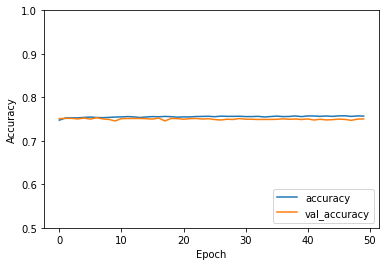

In [29]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose = 0)
training_acc = history.history['accuracy'][-1]
print('Testing Loss: {}\nTesting Accuracy: {}\nTraining Accuracy: {}'.format(test_loss, test_acc, training_acc))
plot_accuracy(model, history)